In [15]:
# Import the Pandas library for data processing and analysis.
import pandas as pd  

# Import the NumPy library for scientific computations.
import numpy as np   

# Import the Matplotlib library for data visualization.
import matplotlib.pyplot as plt  

# Import the TensorFlow library for machine learning and deep learning.
import tensorflow as tf   

# Import Keras, a high-level neural networks API.
from tensorflow import keras   

# Import the layer modules of Keras for building neural network layers.
from tensorflow.keras import layers

In [16]:
# Importing train_test_split function from sklearn.model_selection module
from sklearn.model_selection import train_test_split 

# Importing StandardScaler class from sklearn.preprocessing module
from sklearn.preprocessing import StandardScaler 

In [44]:
# Loading the MNIST dataset from the keras.datasets module
# The dataset consists of 28x28 pixel grayscale images of handwritten digits (0 through 9)
# It is commonly used for training various image classification models
(X_train, y_train), (X_test, y_test) = keras.datasets.mnist.load_data()

In [45]:
# Retrieving the shape of the training data array X_train
X_train.shape

(60000, 28, 28)

In [46]:
# Adding a new axis to the training data array X_train and X_test
# This is done to expand the dimensions of the array to accommodate grayscale images
# The new axis is added at the end, effectively converting each 28x28 image into a 28x28x1 array
X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]

# Normalizing the pixel values of the training and test data arrays by dividing by 255.0
# This scales the pixel values to the range [0, 1], making them suitable for training neural networks
X_train = X_train / 255.0
X_test = X_test / 255.0

# Retrieving the shape of the training data array X_train after preprocessing
X_train.shape

(60000, 28, 28, 1)

In [47]:
# Creating a sequential model using Keras
mdl = keras.Sequential()

# Adding a 2D convolutional layer with 128 filters, each with a 3x3 kernel size and ReLU activation function
# The input shape is determined by the shape of the training data (excluding the batch size)
mdl.add(layers.Conv2D(128, kernel_size=(3, 3), activation="relu", input_shape=X_train.shape[1:]))

# Adding a max pooling layer with a 2x2 pooling window
# This layer reduces the spatial dimensions of the input volume
mdl.add(layers.MaxPool2D(pool_size=(2, 2)))

# Adding another 2D convolutional layer with 64 filters and a 3x3 kernel size, followed by ReLU activation
mdl.add(layers.Conv2D(64, kernel_size=(3, 3), activation="relu"))

# Flattening the output from the convolutional layers into a 1D array
mdl.add(layers.Flatten())

# Adding a dense layer with 256 neurons and ReLU activation function
mdl.add(layers.Dense(256, activation="relu"))

# Adding another dense layer with 128 neurons and ReLU activation function
mdl.add(layers.Dense(128, activation="relu"))

# Adding the output layer with 10 neurons (one for each class) and softmax activation function
# Softmax function is used for multi-class classification to obtain class probabilities
mdl.add(layers.Dense(10, activation="softmax"))

# Compiling the model with the Adam optimizer, sparse categorical crossentropy loss function, and accuracy metric
mdl.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

# Training the model on the training data for 10 epochs
mdl.fit(X_train, y_train, epochs=10)


Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 39ms/step - accuracy: 0.9265 - loss: 0.2370
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9880 - loss: 0.0385
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 75s 40ms/step - accuracy: 0.9926 - loss: 0.0232
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9952 - loss: 0.0157
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 76s 40ms/step - accuracy: 0.9961 - loss: 0.0133
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 39ms/step - accuracy: 0.9964 - loss: 0.0114
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 74s 40ms/step - accuracy: 0.9975 - loss: 0.0091
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 71s 38ms/step - accuracy: 0.9975 - loss: 0.0076
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 73s 39ms/step - accuracy: 0.9975 - loss: 0.0077
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 72s 39ms/step - accuracy: 0.9983 - loss: 0.0060


In [48]:
# Evaluate the machine learning model using the test data
mdl.evaluate(X_test, y_test)


313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9892 - loss: 0.0583


[0.044828154146671295, 0.9905999898910522]

In [49]:
# Predict labels for the test data using the machine learning model
ypred = mdl.predict(X_test)

# Extract the predicted labels from the predicted probabilities
ypred_label = np.argmax(ypred, axis=1)

# Display the predicted labels
ypred_label

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

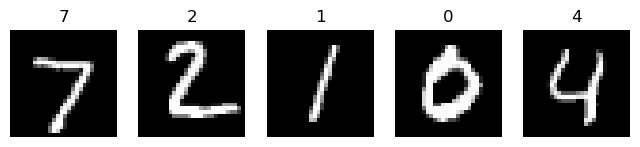

In [50]:
# Set up the figure size for displaying images
plt.figure(figsize=(8, 3))

# Loop through the first 5 samples in the test data
for i in range(5):
    # Create a subplot for each sample
    plt.subplot(1, 5, i + 1)
    
    # Display the image of the current sample
    plt.imshow(X_test[i].reshape(28, 28), "gray")
    
    # Set the title of the subplot as the predicted label for the current sample
    plt.title(ypred_label[i])
    
    # Turn off axis for better visualization
    plt.axis("off")

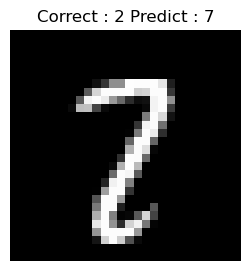

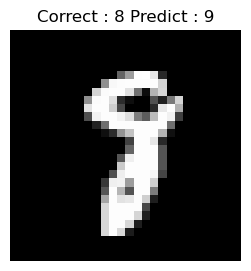

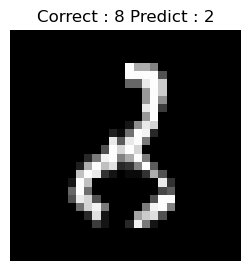

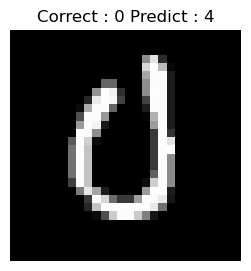

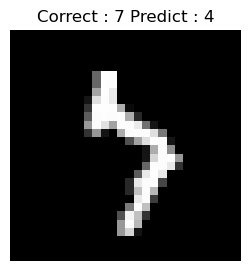

In [54]:
wrong_predict = y_test != ypred_label
# Loop through the first 5 wrong predictions
 # Set up a figure for displaying images
for k in range(5):
     # Create a subplot for each sample
    plt.figure(figsize = (8, 3))
    plt.subplot(1, 2, 1)
    # Display the image of the wrongly predicted sample
    plt.imshow(X_test[wrong_predict][k].reshape(28,28), "gray")
    
    # Set the title of the subplot showing correct and predicted labels
    plt.title(f"Correct : {y_test[wrong_predict][k]} Predict : {ypred_label[wrong_predict][k]}")
    
    # Turn off axis for better visualization
    plt.axis("off") 

plt.show()